In [1]:
import pyreadstat
import pandas as pd
data, meta = pyreadstat.read_dta("sample data.dta")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

list(data.keys())


['cc_why_category',
 'cc_complaint',
 'cc_recipienthh_whyorhow',
 'sur_hh1_name',
 'sur_hh2_name',
 'sur_hh3_name',
 'sur_hh4_name',
 'sur_recipienthh',
 'additional_name',
 'id',
 'cc_know_where_sheets',
 'cc_know_of_sheets',
 'cc_recipienthh_description',
 'phone_district',
 'phone_descriptionoflocation',
 'phone_latitudecoordinate',
 'phone_longitudecoordinate',
 'phone_treatment',
 'phone_numbers',
 'phone_callinadvance',
 'phone_recipienthh',
 'cc_hh1_name',
 'cc_hh2_name',
 'cc_hh3_name',
 'cc_hh4_name',
 'cc_hh5_name',
 'reported_recipient_hh',
 'village',
 'cc_treatment',
 'phonecall',
 'cc_community_description',
 'cc_assistant_call',
 'cc_assistant_remind',
 'cc_par1_gender',
 'cc_par2_gender',
 'cc_par3_gender',
 'cc_par4_gender',
 'cc_par5_gender',
 'cc_par6_gender',
 'cc_par7_gender',
 'cc_par8_gender',
 'cc_par9_gender',
 'cc_par10_gender',
 'cc_par1_age',
 'cc_par2_age',
 'cc_par3_age',
 'cc_par4_age',
 'cc_par5_age',
 'cc_par6_age',
 'cc_par7_age',
 'cc_par8_age',
 'cc_

In [2]:
data["diversion"].std()

0.4982128866278055

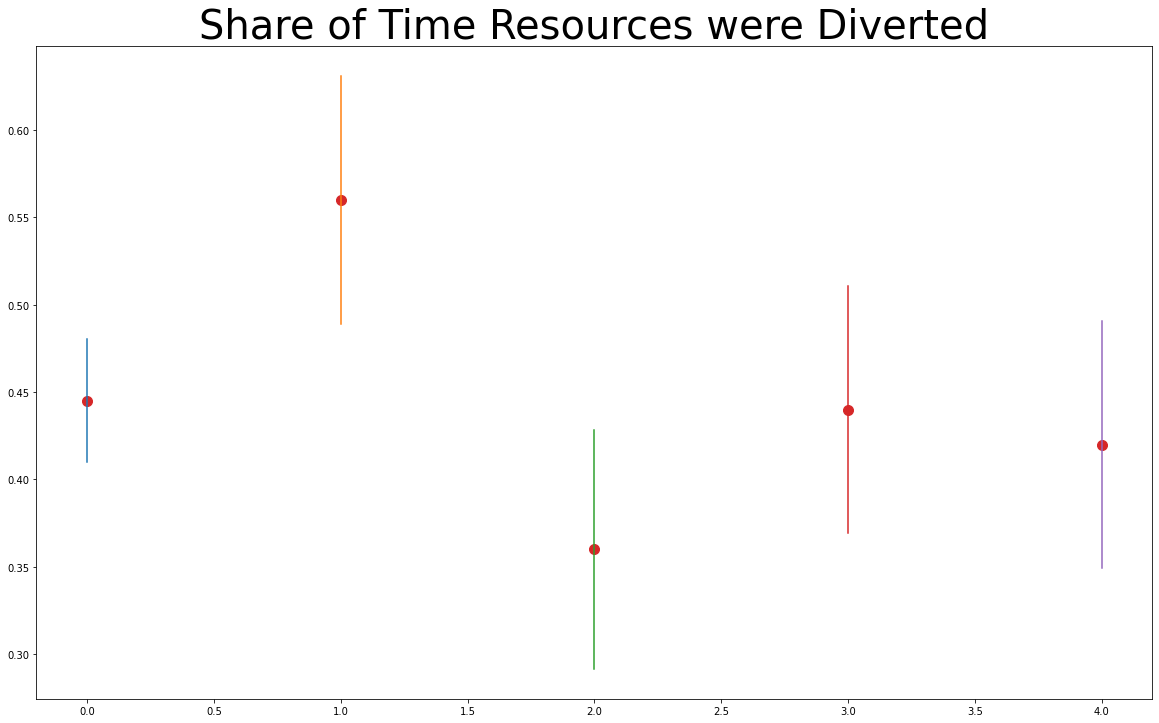

In [3]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
 
treatment= {0: "All Treatments",
            1: "No Monitoring",
            2: "Donor Monitoring",
            3: "Donor and Community Monitoring",
            4: "Donor, Community, and Political Superiors Monitoring"}
fig,ax = plt.subplots(figsize =(20, 12))
plt.title("Share of Time Resources were Diverted", fontsize = 40)
for i in range(0, 5):
    if i == 0:
        mean = data["diversion"].mean()
        sem = data["diversion"].sem()
    else:
        mean = data["diversion"][data["treatment"] == i].mean()
        sem = data["diversion"][data["treatment"] == i].sem()

    min_val = mean - sem #* 1.96
    max_val = mean + sem #* 1.96

    plt.scatter(x = i, y = mean, s = 100, c = "C3")
    plt.plot([i,i], [min_val,max_val])
    # Creating plot

# show plot
plt.show()

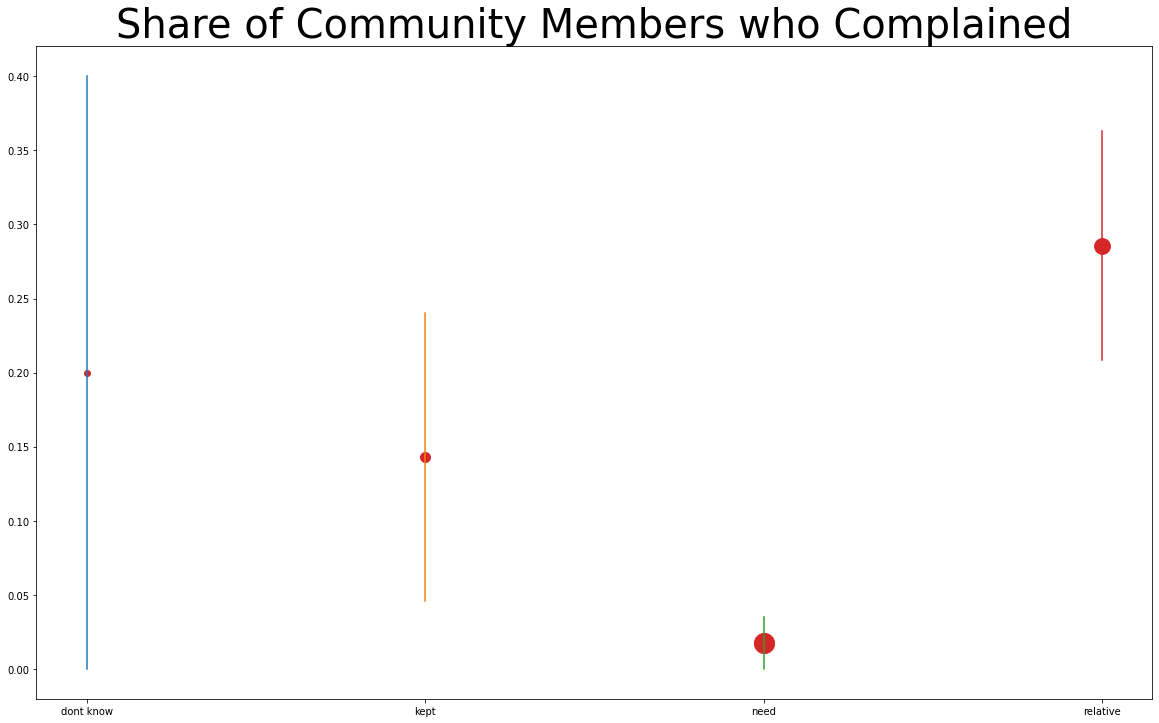

In [4]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
 
# drop the blank category
cc_why_categories = sorted(list(set(data["cc_why_category"])))
cc_why_categories.remove("")

    

fig,ax = plt.subplots(figsize =(20, 12))
plt.title("Share of Community Members who Complained", fontsize = 40)
for cat in cc_why_categories:

    mean = data["cc_complaint"][data["cc_why_category"] == cat].mean()
    sem = data["cc_complaint"][data["cc_why_category"] == cat].sem()
    num_cat = data["cc_complaint"][data["cc_why_category"] == cat].count()
    num_all_cats = data["cc_complaint"].count()
    pct_cat = num_cat / num_all_cats
    
    min_val = mean - sem #* 1.96
    max_val = mean + sem #* 1.96

    plt.scatter(x = cat, y = mean, s = 1000 * pct_cat, c = "C3")
    plt.plot([cat,cat], [min_val,max_val])
    # Creating plot

# show plot
plt.show()

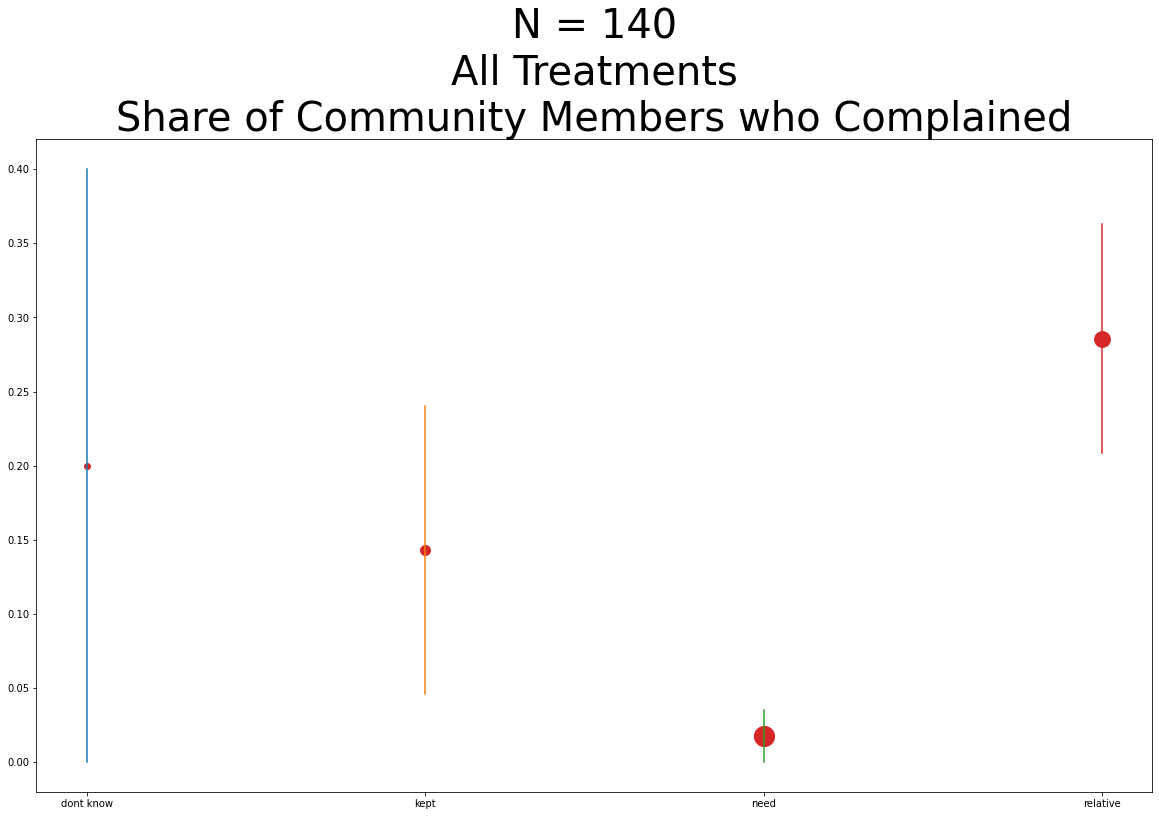

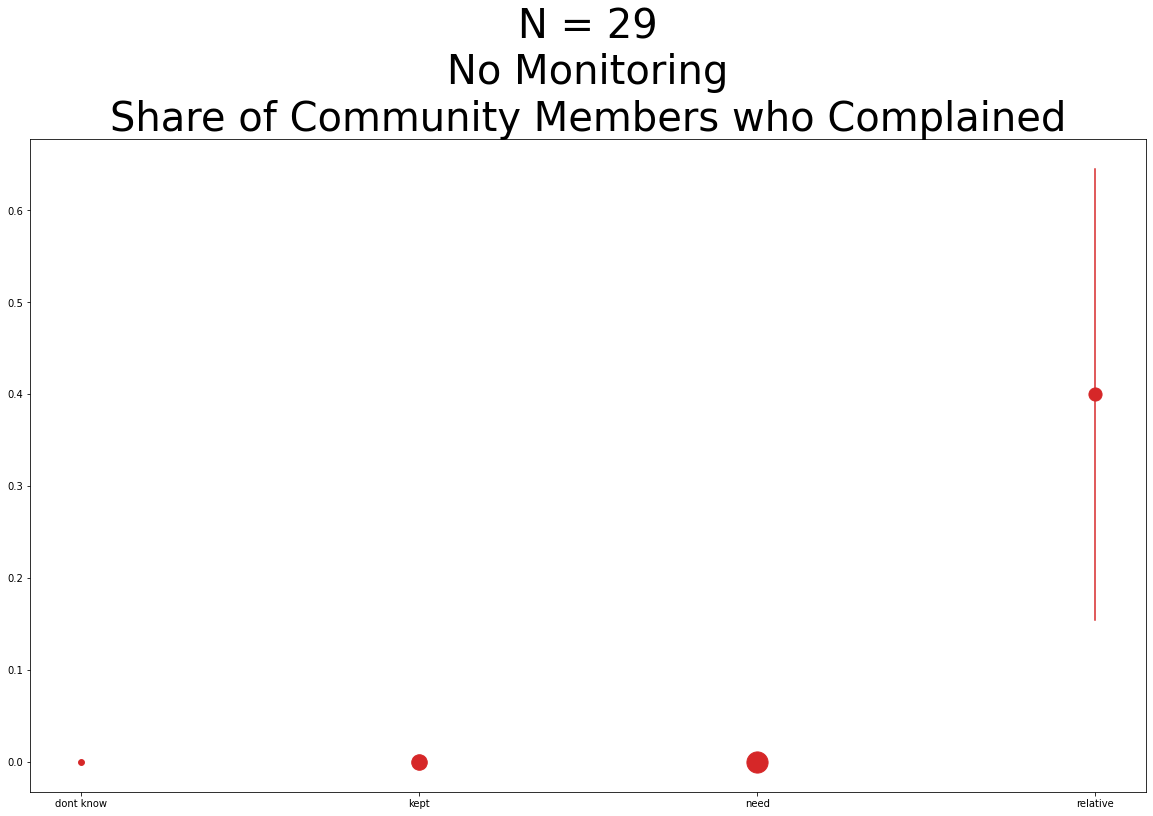

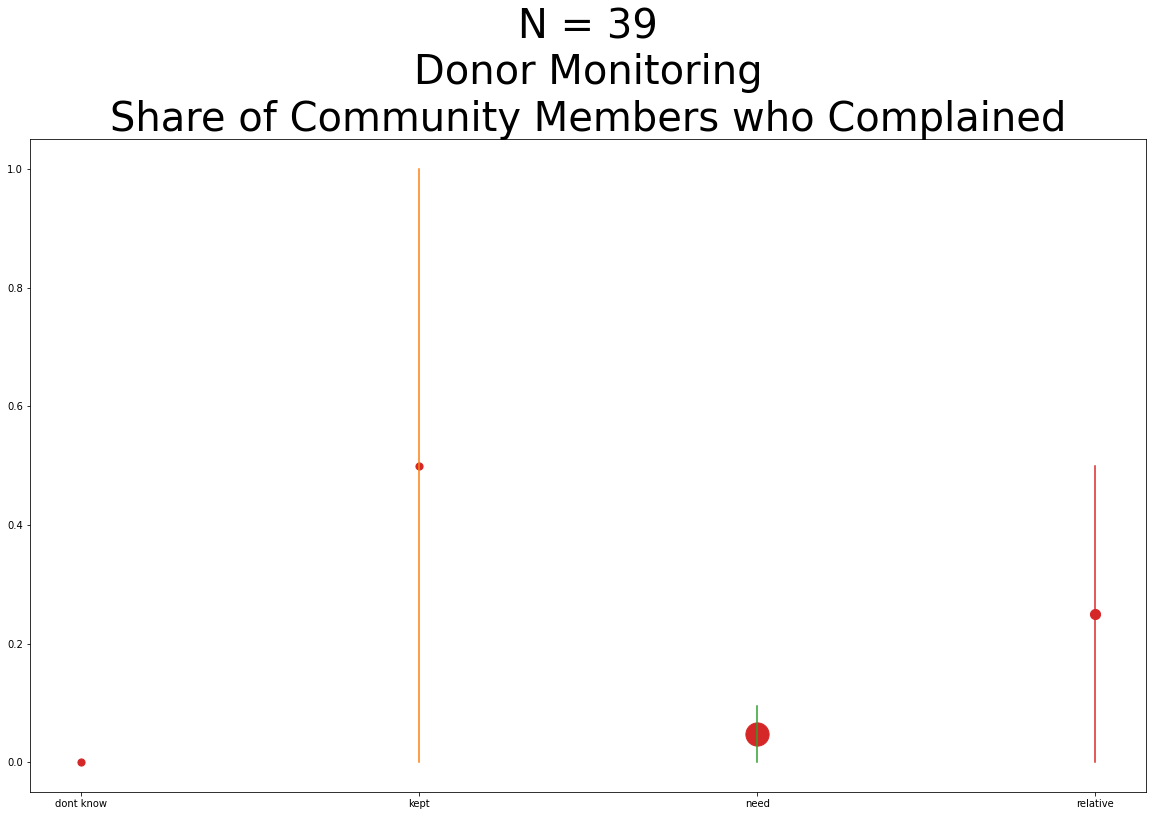

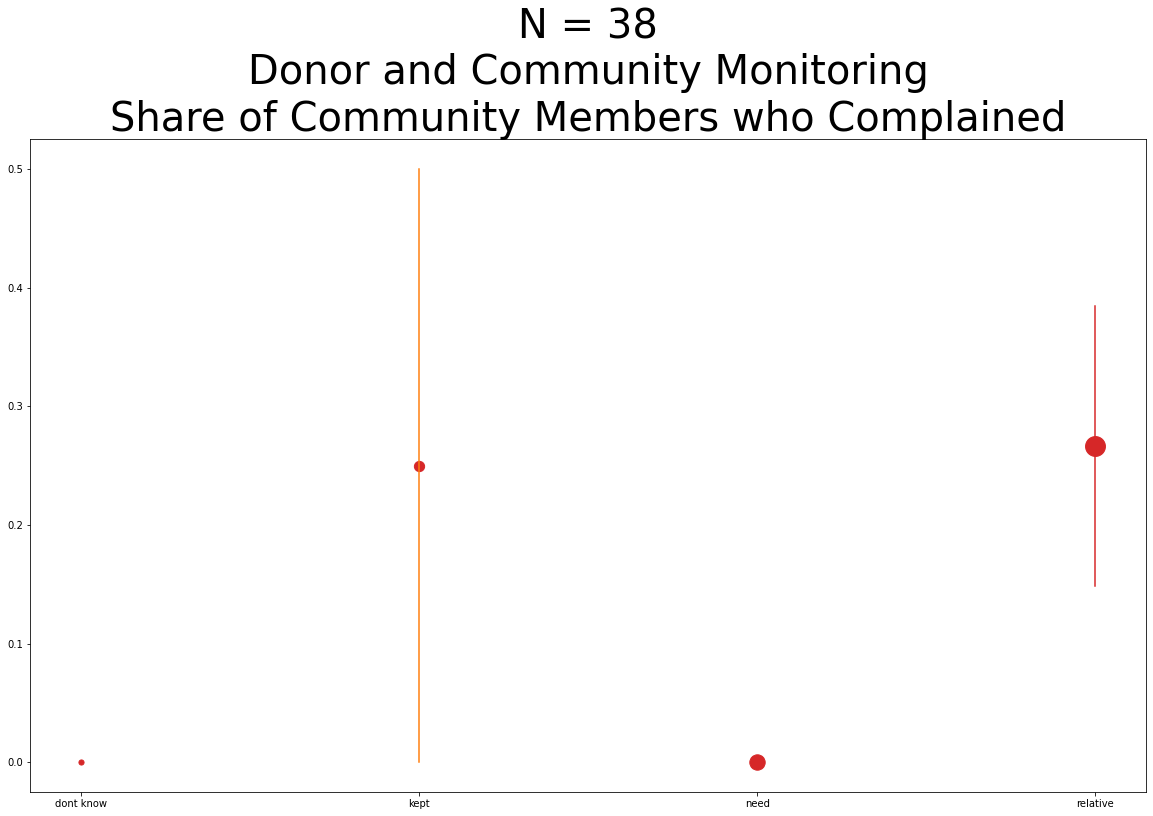

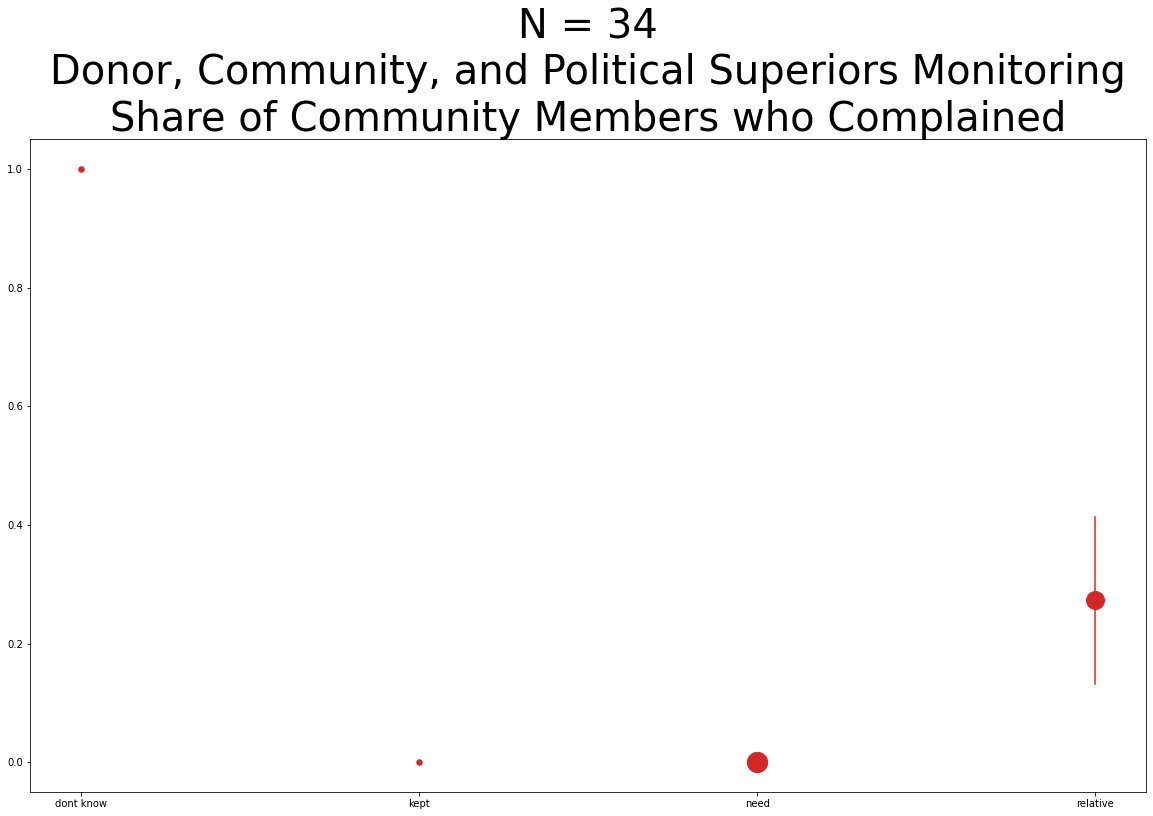

In [5]:
for i in range(0,5):

    fig,ax = plt.subplots(figsize =(20, 12))
    for cat in cc_why_categories:

        if i == 0:
            mean = data["cc_complaint"][data["cc_why_category"] == cat].mean()
            sem = data["cc_complaint"][data["cc_why_category"] == cat].sem()
            num_cat = data["cc_complaint"][data["cc_why_category"] == cat].count()
            num_all_cats = data["cc_complaint"].count()
        else:
            plot_data= data[data["treatment"]==i]
            mean = plot_data["cc_complaint"][data["cc_why_category"] == cat].mean()
            sem = plot_data["cc_complaint"][data["cc_why_category"] == cat].sem()
            num_cat = plot_data["cc_complaint"][data["cc_why_category"] == cat].count()
            num_all_cats = plot_data["cc_complaint"].count()
        pct_cat = num_cat / num_all_cats

        min_val = mean - sem #* 1.96
        max_val = mean + sem #* 1.96

        plt.scatter(x = cat, y = mean, s = 1000 * pct_cat, c = "C3")
        plt.plot([cat,cat], [min_val,max_val])
        # Creating plot
    plt.title("N = " + str(num_all_cats) + "\n" + treatment[i] +  "\nShare of Community Members who Complained", fontsize = 40)

    # show plot
    plt.show()

In [6]:
from statsmodels.stats.power import TTestIndPower
from scipy.stats import ttest_ind
effect_size = 0.8
alpha = 0.05 # significance level
power = 0.8

power_analysis = TTestIndPower()
sample_size = power_analysis.solve_power(effect_size = effect_size, 
                                         power = power, 
                                         alpha = alpha)
sample_size

25.524572500479355

In [7]:
data.groupby("treatment")["diversion"].mean()

treatment
1.0    0.56
2.0    0.36
3.0    0.44
4.0    0.42
Name: diversion, dtype: float64

In [8]:
data.groupby("treatment")["diversion"].sem()

treatment
1.0    0.070912
2.0    0.068571
3.0    0.070912
4.0    0.070508
Name: diversion, dtype: float64

In [9]:
outcomes = sorted(list(set(data["treatment"])))

for outcome in outcomes:
    new_var = "treatment"+ str(int(outcome))
    data[new_var] = 0
    data[new_var][data["treatment"] == outcome] = 1
    print(data[new_var])


0      0
1      0
2      0
3      1
4      0
5      0
6      1
7      0
8      0
9      1
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     1
23     1
24     0
25     1
26     0
27     0
28     0
29     0
30     0
31     0
32     1
33     0
34     0
35     1
36     1
37     0
38     0
39     1
40     0
41     0
42     0
43     1
44     0
45     0
46     0
47     1
48     0
49     1
50     0
51     0
52     0
53     0
54     0
55     0
56     0
57     0
58     1
59     0
60     0
61     0
62     0
63     1
64     0
65     0
66     1
67     0
68     0
69     0
70     0
71     0
72     0
73     1
74     0
75     0
76     0
77     0
78     0
79     0
80     0
81     0
82     1
83     1
84     1
85     1
86     1
87     1
88     0
89     0
90     1
91     0
92     1
93     0
94     0
95     0
96     0
97     0
98     0
99     1
100    0
101    1
102    1
103    0
104    1
105    1
106    0
107    0
108    0
109    0
110    0
1

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A

In [10]:
import matplotlib.pyplot as plt
import numpy as np
#from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
#import statsmodels.formula.api as sm
import statsmodels.discrete.discrete_model as sm

# only include 3 of 4 treatments or else observations are not linearly independent
x = ["treatment" + str(i) for i in range(2,5)]
y = ["diversion"]

data[x]

,treatment2,treatment3,treatment4
0,0,0,1
1,1,0,0
2,1,0,0
3,0,0,0
4,0,1,0
5,0,1,0
6,0,0,0
7,0,1,0
8,0,0,1
9,0,0,0


In [11]:
X = data[x]
X["Constant"] = 1
Y = data[y]
model = sm.Logit(Y, X)
results = model.fit(cov_type='HC1')
print(results.summary())
predict = results.predict()


#confusion_matrix(Y, predict)
#model = LogisticRegression(solver='liblinear', random_state=0).fit(x, y)

#diversion = f(treatments)

# diversion = f(treatments + chief characteristics)
    #how long chief, community whole life, income, education
    

Optimization terminated successfully.
         Current function value: 0.676392
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              diversion   No. Observations:                  200
Model:                          Logit   Df Residuals:                      196
Method:                           MLE   Df Model:                            3
Date:                Fri, 11 Jun 2021   Pseudo R-squ.:                 0.01556
Time:                        08:16:04   Log-Likelihood:                -135.28
converged:                       True   LL-Null:                       -137.42
Covariance Type:                  HC1   LLR p-value:                    0.2331
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
treatment2    -0.8165      0.410     -1.992      0.046      -1.620      -0.013
treatment3    -0.4823      0.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
y = ["cc_complaint"]
df = data[x+y].dropna()
X = df[x]
X["Constant"] = 1
Y = df[y]
model = sm.Logit(Y, X)
results = model.fit(cov_type='HC1')
print(results.summary())
predict = results.predict()


#confusion_matrix(Y, predict)
#model = LogisticRegression(solver='liblinear', random_state=0).fit(x, y)

#cc_complaint = f(treatments)

# cc_complaint = f(treatments + chief characteristics)
    #how long chief, community whole life, income, education
    

Optimization terminated successfully.
         Current function value: 0.321183
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           cc_complaint   No. Observations:                  140
Model:                          Logit   Df Residuals:                      136
Method:                           MLE   Df Model:                            3
Date:                Fri, 11 Jun 2021   Pseudo R-squ.:                 0.01200
Time:                        08:18:41   Log-Likelihood:                -44.966
converged:                       True   LL-Null:                       -45.512
Covariance Type:                  HC1   LLR p-value:                    0.7790
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
treatment2     0.1178      0.948      0.124      0.901      -1.740       1.975
treatment3     0.7156      0.